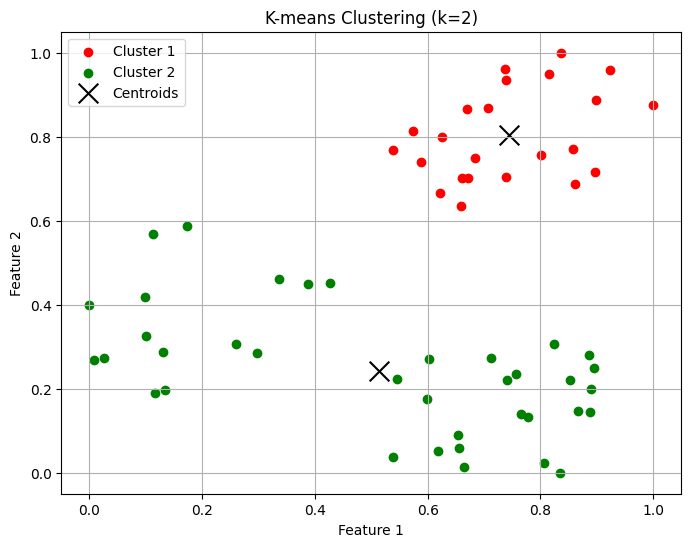

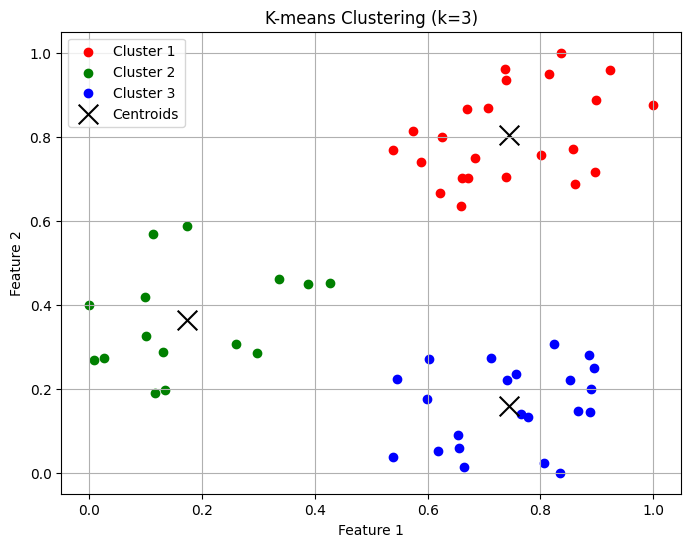

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ## Step 1: Load the dataset
# Read the dataset from the CSV file (Ensure correct file path)
df = pd.read_csv("DATA.csv")

# Extract only the first two numerical columns for clustering
X = df.iloc[:, :2].values  # Taking the first two columns

# ## Step 2: Normalize the dataset using Min-Max Scaling
def min_max_scaling(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X = min_max_scaling(X)

# ## Step 3: Define Euclidean Distance Function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# ## Step 4: Implement K-Means Clustering
def k_means(X, k, max_iters=100):
    np.random.seed(23)  # For reproducibility

    # Initialize centroids randomly from the dataset
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        clusters = {i: [] for i in range(k)}

        # Assign each data point to the closest centroid
        for point in X:
            distances = euclidean_distance(point, centroids)
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)

        # Compute new centroids as the mean of assigned points
        new_centroids = np.array([np.mean(clusters[i], axis=0) if clusters[i] else centroids[i] for i in range(k)])

        # If centroids do not change, stop iteration
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, clusters

# ## Step 5: Function to Plot the Clusters
def plot_clusters(X, centroids, clusters, k):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    plt.figure(figsize=(8, 6))

    # Plot each cluster with different colors
    for i in range(k):
        cluster_points = np.array(clusters[i])
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=200, label='Centroids')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# ## Step 6: Run K-Means for k=2 and k=3
for k in [2, 3]:
    centroids, clusters = k_means(X, k)
    plot_clusters(X, centroids, clusters, k)